<h1> Question 1 </h1>

<p>1. A customer informed their consultant that they have developed several formulations of petrol that gives different characteristics of burning pattern. The formulations are obtaining by adding varying levels of additives that, for example, prevent engine knocking, gum prevention, stability in storage, and etc. However, a third party certification organisation would like to verify if the formulations are significantly different, and request for both physical and statistical proof. Since the formulations are confidential information, they are not named in the dataset.</p>

<p>Please assist the consultant in the area of statistical analysis by doing this;<br>
<b>a. A descriptive analysis of the additives (columns named as “a” to “i”), which must include summaries of findings (parametric/non-parametric). Correlation and ANOVA, if applicable, is a must.</b></p>

In [100]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [101]:
df = pd.read_csv("ingredient.csv")

In [102]:
# return tuple of shape (rows, columns) of dataframe
df.shape

(214, 9)

In [103]:
# return some statistical data i.e. count, mean, standard deviation, min, max, percentile
df.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [104]:
# check for null value
df.isnull().any()

a    False
b    False
c    False
d    False
e    False
f    False
g    False
h    False
i    False
dtype: bool

In [105]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,a,b,c,d,e,f,g,h,i
a,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
b,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
c,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
d,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
e,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
f,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
g,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
h,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
i,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


<br><p><b>Summary:</b></p>
<ul>
    <li>Ingredient.csv contains 214 rows and 9 columns of data. </li>
    <li>All columns contain numerical values.</li><li>There is no missing values in the dataframe.</li>
    <li>The basic statistical data has been computed using df.describe()</li>
    <li>a & g has strong positive correlation and a & e has comparatively stronger negative correlation.
</ul> </p>

<b> b. A graphical analysis of the additives, including a distribution study.</b>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4f2086c50>,
      dtype=object)

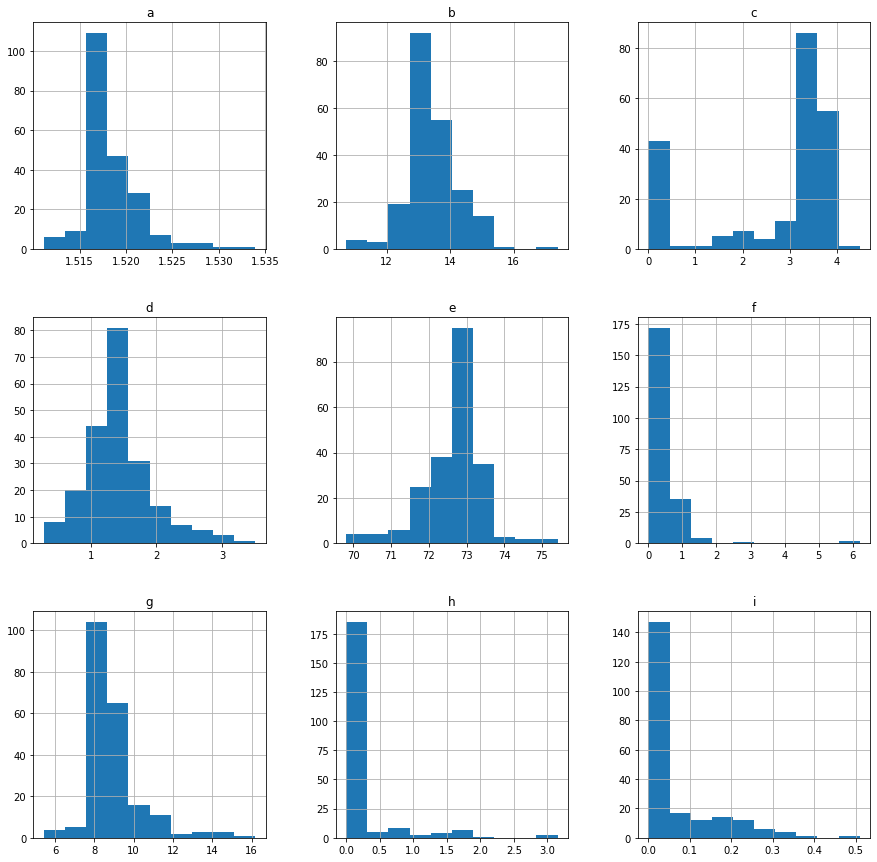

In [106]:
# return histogram to show the distribution
df.hist(figsize=(15,15))

<p><b>c. A clustering test of your choice (unsupervised learning), to determine the distinctive number of formulations present in the dataset.</b></p>

In [107]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

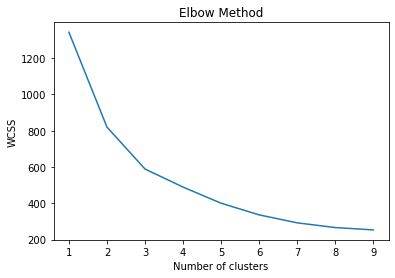

In [108]:
# Elbow method to find optimal number of clusters for k-means clustering
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [109]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

pd.DataFrame(df_scaled).describe()

# k means using 3 clusters and k-means++ initialization
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df_scaled)
pred = kmeans.predict(df_scaled)
pred_y = kmeans.fit_predict(df_scaled)

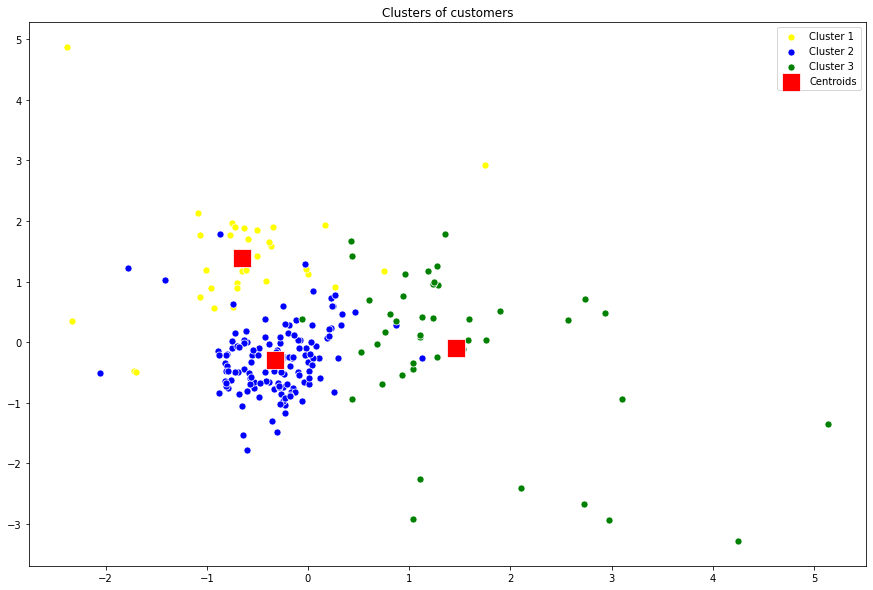

In [110]:
# Visualising the clusters
plt.figure(figsize=(15,10))
sns.scatterplot(df_scaled[pred_y == 0, 0], df_scaled[pred_y == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(df_scaled[pred_y == 1, 0], df_scaled[pred_y == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(df_scaled[pred_y == 2, 0], df_scaled[pred_y == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.legend()
plt.show()

<p> The data can be grouped into 3 clusters.</p>